# *Bosonic statistics and the Bose-Einstein condensation*

`Doruk Efe Gökmen -- 30/08/2018 -- Ankara`

## Non-interacting ideal bosons
Non-interacting bosons is the only system in physics that can undergo a phase transition without mutual interactions between its components.

Let us enumerate the energy eigenstates of a single 3D boson in an harmonic trap by the following program.

In [1]:
Emax = 30
States = []
for E_x in range(Emax):
    for E_y in range(Emax):
        for E_z in range(Emax):
            States.append(((E_x + E_y + E_z), (E_x, E_y, E_z)))
States.sort()
for k in range(Emax):
    print '%3d' % k, States[k][0], States[k][1]

  0 0 (0, 0, 0)
  1 1 (0, 0, 1)
  2 1 (0, 1, 0)
  3 1 (1, 0, 0)
  4 2 (0, 0, 2)
  5 2 (0, 1, 1)
  6 2 (0, 2, 0)
  7 2 (1, 0, 1)
  8 2 (1, 1, 0)
  9 2 (2, 0, 0)
 10 3 (0, 0, 3)
 11 3 (0, 1, 2)
 12 3 (0, 2, 1)
 13 3 (0, 3, 0)
 14 3 (1, 0, 2)
 15 3 (1, 1, 1)
 16 3 (1, 2, 0)
 17 3 (2, 0, 1)
 18 3 (2, 1, 0)
 19 3 (3, 0, 0)
 20 4 (0, 0, 4)
 21 4 (0, 1, 3)
 22 4 (0, 2, 2)
 23 4 (0, 3, 1)
 24 4 (0, 4, 0)
 25 4 (1, 0, 3)
 26 4 (1, 1, 2)
 27 4 (1, 2, 1)
 28 4 (1, 3, 0)
 29 4 (2, 0, 2)


Here it can be perceived that the degeneracy at an energy level $E_n$, which we denote by $\mathcal{N}(E_n)$, is $\frac{(n+1)(n+2)}{2}$. Alternatively, we may use a more systematic approach. We can calculate the number of states at the $n$th energy level as $\mathcal{N}(E_n)=\sum_{E_x=0}^{E_n}\sum_{E_y=0}^{E_n}\sum_{E_z=0}^{E_n}\delta_{(E_x+E_y+E_z),E_n}$, where $\delta_{j,k}$ is the Kronecker delta. In the continuous limit we have the Dirac delta function 

$\delta_{j,k}\rightarrow\delta(j-k) =\int_{-\pi}^\pi \frac{\text{d}\lambda}{2\pi}e^{i(j-k)\lambda}$. (1)

If we insert this function into above expression, we get $\mathcal{N}(E_n)=\int_{-\pi}^\pi \frac{\text{d}\lambda}{2\pi}e^{-iE_n\lambda}\left(\sum_{E_x=0}^{E_n}e^{iE_x\lambda}\right)^3$. The geometric sum can be evaluated, hence we have the integral $\mathcal{N}(E_n)=\int_{-\pi}^\pi \frac{\text{d}\lambda}{2\pi}e^{-iE_n\lambda}\left[\frac{1-e^{i\lambda (n+1)}}{1-e^{i\lambda}}\right]^3$. The integration range corresponds to a circular contour $\mathcal{C}$ of radius 1 centered at 0 at the complex plane. If we define $z=e^{i\lambda}$, the integral transforms into $\mathcal{N}(E_n)=\frac{1}{2\pi i}\oint_{\mathcal{C}}\frac{\text{d}z}{z^{n+1}}\left[\frac{1-z^{n+1}}{1-z}\right]^3$. Using the residue theorem, this integral can be evaluated by determining the coefficient of the $z^{-1}$ term in the Laurent series of $\frac{1}{z^{n+1}}\left[\frac{1-z^{n+1}}{1-z}\right]^3$, which is $(n+1)(n+1)/2$. Hence we recover the previous result.

##### Five boson bounded trap model
Consider 5 bosons in the harmonic trap, but with a cutoff on the single-particle energies: $E_\sigma\leq 4$. There are $34$ possible single-particles energy states. For this model, the above naive enumeration of these energy states still works. We can label the state of each 5 particle by $\sigma_i$, so that $\{\text{5-particle state}\}=\{\sigma_1,\cdots,\sigma_5\}$. The partititon function for this system is given by $Z(\beta)=\sum_{0\leq\sigma_1\leq\cdots\leq\sigma_5\leq 34}e^{-\beta E(\sigma_1,\cdots,\sigma_5)}$. In the following program, the average occupation number of the ground state per particle is calculated at different temperatures (corresponds to the condensate). However, due to the nested for loops, this method is very inconvenient for higher number of particles. 

Populating the interactive namespace from numpy and matplotlib
Temperature: 1.0 Total number of possible states: 575757 | Partition function: 17.3732972183 | Average energy per particle: 1.03133265311 | Condensate fraction (ground state occupation per particle): 0.446969501933


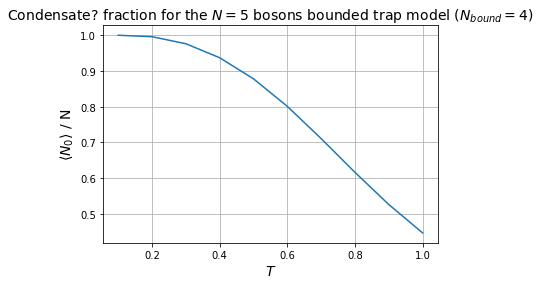

In [10]:
%pylab inline
import math, numpy as np, pylab as plt

#calculate the partition function for 5 bosons by stacking the bosons in one of the N_states 
#number of possible states and counting only a specific order of them (they are indistinguishable)
def bosons_bounded_harmonic(beta, N):
    Energy = [] #initialise the vector that the energy values are saved with enumeration
    n_states_1p = 0 #initialise the total number of single trapped boson states
    for n in range(N + 1):
        degeneracy = (n + 1) * (n + 2) / 2  #degeneracy in the 3D harmonic oscillator
        Energy += [float(n)] * degeneracy    
        n_states_1p += degeneracy
        
    n_states_5p = 0 #initialise the total number states of 5 trapped bosons
    Z = 0.0 #initialise the partition function
    N0_mean = 0.0
    E_mean = 0.0 
    for s_0 in range(n_states_1p):
        for s_1 in range(s_0, n_states_1p): #consider the order s_0<s_1... to avoid overcounting
            for s_2 in range(s_1, n_states_1p):
                for s_3 in range(s_2, n_states_1p):
                    for s_4 in range(s_3, n_states_1p):
                        n_states_5p += 1
                        state = [s_0, s_1, s_2, s_3, s_4] #construct the state of each 5 boson
                        E = sum(Energy[s] for s in state) #calculate the total energy by above enumeration
                        Z += math.exp(-beta * E) #canonical partition function
                        E_mean += E * math.exp(-beta * E) #avg. total energy
                        N0_mean += state.count(0) * math.exp(-beta * E) #avg. ground level occupation number
    return n_states_5p, Z, E_mean, N0_mean
                        
N = 4 #the energy cutoff for each boson
beta = 1.0 #inverse temperature

n_states_5p, Z, E_mean, N0_mean = bosons_bounded_harmonic(beta, N)

print 'Temperature:', 1 / beta, 'Total number of possible states:', n_states_5p, '| Partition function:', Z,\
        '| Average energy per particle:', E_mean / Z / 5.0,\
        '| Condensate fraction (ground state occupation per particle):', N0_mean / Z / 5.0

cond_frac = []
temperature = []
for T in np.linspace(0.1, 1.0, 10):
    n_states_5p, Z, E_mean, N0_mean = bosons_bounded_harmonic(1.0 / T, N)
    cond_frac.append(N0_mean / Z / 5.0)
    temperature.append(T)
    
plt.plot(temperature, cond_frac)
plt.title('Condensate? fraction for the $N=5$ bosons bounded trap model ($N_{bound}=%i$)' % N, fontsize = 14)
plt.xlabel('$T$', fontsize = 14)
plt.ylabel('$\\langle N_0 \\rangle$ / N', fontsize = 14)
plt.grid()

Here we see that all particles are in the ground states at very low temperatures this is a simple consequence of Boltzmann statistics. At zero temperature all the particles populate the ground state. Bose-Einstein condensation is something else, it means that a finite fraction of the system is in the ground-state for temperatures which are much higher than the gap between the gap between the ground-state and the first excited state, which is one, in our system. Bose-Einstein condensation occurs when all of a sudden a finite fraction of particles populate the single-particle ground state. In a trap, this happens at higher and higher temperatures as we increase the particle number.



Alternatively, we can characterise any single particle state $\sigma=0,\cdots,34$ by an occupation number $n_\sigma$. Using this occupation number representation, the energy is given by $E=n_0E_0+\cdots + n_{34}E_{34}$, and the partition function is $Z(\beta)=\sum^{N=5}_{n_0=0}\cdots\sum^{N=5}_{n_{34}=0}e^{-\beta(n_0E_0+\cdots + n_{34}E_{34})}\delta_{(n_0+\cdots + n_{34}),N=5}$. Using the integral representation of the Kronecker delta given in (1), and evaluating the resulting sums, we have 

$Z(\beta)=\int_{-\pi}^\pi\frac{\text{d}\lambda}{2\pi}e^{-iN\lambda}\Pi_{E=0}^{E_\text{max}}[f_E(\beta,\lambda)]^{\mathcal{N}(E)}$. (2)

### The bosonic density matrix

**Distinguishable particles:** The partition function of $N$ distinguishable particles is given by $Z^D(\beta)=\int \text{d}\mathbf{x}\rho(\mathbf{x},\mathbf{x},\beta)$, where $\mathbf{x}=\{0,\cdots,N-1\}$, i.e. the positions of the $i$th particle; and $\rho$ is the $N$ distinguishable particle density matrix. If the particles are non-interacting (ideal), then the density matrix can simply be decomposed into $N$ single particle density matrices as 

$\rho^{D,\text{ideal}}(\mathbf{x},\mathbf{x}',\beta)=\Pi_{i=0}^{N-1}\rho(x_i,x_i',\beta)$, (3)

with the single particle density matrix $\rho(x_i,x_i',\beta)=\sum_{\lambda_i=0}^{\infty}\psi_{\lambda_i}(x_i)\psi_{\lambda_i}^{*}(x'_i)e^{-\beta E_{\lambda_i}}$, where $\lambda_i$ is the energy eigenstate of the $i$th particle. That means that the quantum statistical paths of the two particles are independent. More generally, the interacting many distinguishable particle density matrix is

$\rho^{D}(\mathbf{x},\mathbf{x}',\beta)=\sum_{\sigma}\Psi_{\sigma}(\mathbf{x})\Psi_{\sigma}^{*}(\mathbf{x}')e^{-\beta E_{\sigma}}$, (4)

where the sum is done over the all possible $N$ particle states $\sigma=\{\lambda_0,\cdots,\lambda_{N-1}\}$. The interacting paths are described by the paths whose weight are modified through Trotter decomposition, which *correlates* those paths. 

**Indistinguishable particles:** The particles $\{0,\cdots,N-1\}$ are indistinguishable if and only if 

$\Psi_{\sigma_\text{id}}(\mathbf{x})=\xi^\mathcal{P}\Psi_{\sigma_\text{id}}(\mathcal{P}\mathbf{x})$ $\forall \sigma$, (5)

where they are in an indistinguishable state ${\sigma_\text{id}}$, $\mathcal{P}$ is any $N$ particle permutation and the *species factor* $\xi$ is $-1$ (antisymmetric) for fermions, and $1$ (symmetric) for bosons. Here we focus on the bosonic case. Since there are $N!$ such permutations, if the particles are indistinguishable bosons, using (5) we get $\frac{1}{N!}\sum_{\mathcal{P}}\Psi_\sigma(\mathcal{P}x)=\Psi_\sigma(\mathbf{x})$, i.e. $\Psi_\sigma(x)=\Psi_{\sigma_\text{id}}(x)$. Furthermore, from a group theory argument it follows that $\frac{1}{N!}\sum_{\mathcal{P}}\Psi_\sigma(\mathcal{P}x)=0$ otherwise (fermionic or distinguishable). This can be expressed in a more compact form as

$\frac{1}{N!}\sum_{\mathcal{P}}\Psi_\sigma(\mathcal{P}x)=\delta_{{\sigma_\text{id}},\sigma}\Psi_\sigma(x)$. (6)

By definition, the bosonic density matrix should be $\rho^\text{bose}(\mathbf{x},\mathbf{x}',\beta)=\sum_{\sigma=\{\sigma_\text{id}\}}\Psi_\sigma(\mathbf{x})\Psi^{*}_\sigma(\mathbf{x}')e^{-\beta E_\sigma}=\sum_{\sigma}\delta_{{\sigma_\text{id}},\sigma}\Psi_\sigma(\mathbf{x})\Psi^{*}_\sigma(\mathbf{x}')e^{-\beta E_\sigma}$, i.e. a sum over all $N$ particle states which are symmetric. If we insert Eqn. (6) here in the latter equality, we get $\rho^\text{bose}(\mathbf{x},\mathbf{x}',\beta)=\frac{1}{N!}\sum_\sigma\Psi_\sigma(\mathbf{x})\sum_\mathcal{P}\Psi^{*}_\sigma(\mathcal{P}\mathbf{x}')e^{-\beta E_\sigma}$. Exchanging the sums, we get $\rho^\text{bose}(\mathbf{x},\mathbf{x}',\beta)=\frac{1}{N!}\sum_\mathcal{P}\sum_\sigma\Psi_\sigma(\mathbf{x})\Psi^{*}_\sigma(\mathcal{P}\mathbf{x}')e^{-\beta E_\sigma}$. In other words, we simply have 

$\boxed{\rho^\text{bose}(\mathbf{x},\mathbf{x}',\beta)=\frac{1}{N!}\sum_\mathcal{P}\rho^D(\mathbf{x},\mathcal{P}\mathbf{x}',\beta)}$, (7)

that is the average of the distinguishable density matrices over all permutations of $N$ particles.

For ideal bosons, we have $\boxed{\rho^\text{bose, ideal}(\mathbf{x},\mathbf{x}',\beta)=\frac{1}{N!}\sum_\mathcal{P}\rho(x_0,\mathcal{P}x_0',\beta)\rho(x_1,\mathcal{P}x_1',\beta)\cdots\rho(x_{N-1},\mathcal{P}x_{N-1}',\beta)}$. (8)

The partition function is therefore 

$Z^\text{bose}(\beta)=\frac{1}{N!}\int \text{d}x_0\cdots\text{d}x_{N-1}\sum_\mathcal{P}\rho^D(\mathbf{x},\mathcal{P}\mathbf{x},\beta)=\frac{1}{N!}\sum_\mathcal{P}Z_\mathcal{P}$, (9)


i.e. an integral over paths and an average over all permutations. We should therefore sample both positions and permutations.

For fermions, the sum over permutations $\mathcal{P}$ involve a weighting with factor $(-1)^{\mathcal{P}}$: 

$\rho^\text{fermi}(\mathbf{x},\mathbf{x}',\beta)=\frac{1}{N!}\sum_\mathcal{P}(-1)^\mathcal{P}\rho^D(\mathbf{x},\mathcal{P}\mathbf{x}',\beta)$

Therefore for fermions corresponding path integrals are nontrivial, and they involve Grassmann variables (see e.g. Negele, Orland https://www.amazon.com/Quantum-Many-particle-Systems-Advanced-Classics/dp/0738200522 ).

#### Sampling permutations

The following Markov-chain algorithm samples permutations of $N$ elements on a list $L$. The permutation function for the uniformly distributed $\mathcal{P}$ is $Y_N=\sum_\mathcal{P}1=N!$.

In [ ]:
import random

N = 3 #length of the list
statistics = {}
L = range(N) #initialise the list
nsteps = 10
for step in range(nsteps):
    i = random.randint(0, N - 1) #pick two random indices i and j from the list L
    j = random.randint(0, N - 1)
    L[i], L[j] = L[j], L[i] #exchange the i'th and j'th elements
    if tuple(L) in statistics: 
        statistics[tuple(L)] += 1 #if a certain configuration appears again, add 1 to its count
    else:
        statistics[tuple(L)] = 1 #if a certain configuration for the first time, give it a count of 1
    print L
    print range(N)
    print

for item in statistics:
    print item, statistics[item]

Let us look at the permutation cycles and their frequency of occurrence:

In [26]:
import random

N = 20 #length of the list
stats = [0] * (N + 1) #initialise the "stats" vector
L = range(N) #initialise the list
nsteps = 1000000 #number of steps
for step in range(nsteps):
    i = random.randint(0, N - 1) #pick two random indices i and j from the list L
    j = random.randint(0, N - 1)
    L[i], L[j] = L[j], L[i] #exchange the i'th and j'th elements in the list L
    #Calculate the lengths of the permutation cycles in list L
    if step % 100 == 0: #i.e. at each 100 steps
        cycle_dict = {} #initialise the permutation cycle dictionary
        for k in range(N): #loop over the list length,where keys (k) represent the particles
            cycle_dict[k] = L[k] #and the values (L) are for the successors of the particles in the perm. cycle
        while cycle_dict != {}: #i.e. when the cycle dictionary is not empty?
            starting_element = cycle_dict.keys()[0] #save the first (0th) element in the cycle as the starting element
            cycle_length = 0 #initialise the cycle length
            old_element = starting_element #ancillary variable
            while True:
                cycle_length += 1 #increase the cycle length while...
                new_element = cycle_dict.pop(old_element) #get the successor of the old element in the perm. cycle
                if new_element == starting_element: break #the new element is the same as the first one (cycle complete)
                else: old_element = new_element #move on to the next successor in the perm. cycle
            stats[cycle_length] += 1 #increase the number of occurrences of a cycle of that length by 1
for k in range(1, N + 1): #print the cycle lengths and their number of occurrences
    print k, stats[k] 

1 10130
2 5008
3 3395
4 2438
5 1969
6 1659
7 1403
8 1260
9 1118
10 949
11 943
12 833
13 778
14 745
15 642
16 618
17 610
18 553
19 530
20 492


The partition function of permutations $\mathcal{P}$ on a list of lentgth $N$ is $Y_N=\sum_\mathcal{P}\text{weight}(\mathcal{P})$. Let $z_n$ be the weight of a permutation cycle of length $n$. Then, the permutation $[0,1,2,3]\rightarrow[0,1,2,3]$, which can be represented as $(0)(1)(2)(3)$, has the weight $z_1^4$; similarly, $(0)(12)(3)$ would have $z_1^2z_2$, etc.

Generally, the cycle $\{n_1,\cdots,n_{k-1},\text{last element}\}$, i.e. the cycle containing the last element, has a length $k$, with the weight $z_k$. The remaining $N-k$ elements have the partition function $Y_{(N-k)}$. Hence, the total partition function is given by $Y_N=\sum_{k=1}^Nz_k\{\text{# of choices for} \{n_1,\cdots,n_{k-1}\}\}\{\text{# of cycles with} \{n_1,\cdots,n_{k}\}\}Y_{N-k}$

$\implies Y_N=\sum_{k=1}^N z_k{{N-1}\choose{k-1}}(k-1)!Y_{N-k}$ which leads to the following recursion formula

$\boxed{Y_N=\frac{1}{N}\sum_{k=1}^N z_k\frac{N!}{(N-k)!}Y_{N-k}, (\text{with }Y_0=1)}$. (10)

***Using the convolution property, we can regard the $l+1$ bosons in a permutation cycle of length $l$ at temperatyre $1/\beta$ as a single boson at a temperature $1/(l\beta)$.***

*Example 1:* Consider the permutation $[0,3,1,2]\rightarrow[0,1,2,3]$ consists of the following permutation cycle $1\rightarrow 2 \rightarrow 3 \rightarrow 1$ of length 3 ($\mathcal{P}=(132)$). This corresponds to the partition function $Z^\text{bose}_{(0)(132)}(\beta)=\int \text{d}x_0\rho(x_0,x_0,\beta)\int\text{d}x_1\int\text{d}x_2\int\text{d}x_3\rho(x_1,x_3,\beta)\rho(x_3,x_2,\beta)\rho(x_2,x_1,\beta)$. Using the convolution property, we have: $\int\text{d}x_3\rho(x_1,x_3,\beta)\rho(x_3,x_2,\beta)=\rho(x_1,x_2,2\beta)\implies\int\text{d}x_2\rho(x_1,x_2,2\beta)\rho(x_2,x_1,\beta)=\rho(x_1,x_1,3\beta)$. The single particle partition function is defined as $z(\beta)=\int\text{d}\mathbf{x}\rho(\mathbf{x},\mathbf{x},\beta) =\left[ \int\text{d}x\rho(x,x,\beta)\right]^3$.

$\implies Z^\text{bose}_{(0)(132)}(\beta)=\int \text{d}x_0\rho(x_0,x_0,\beta)\int\text{d}x_1\rho(x_1,x_1,3\beta)=z(\beta)z(3\beta)$.

*Example 2:* $Z^\text{bose}_{(0)(1)(2)(3)}(\beta)=z(\beta)^4$.

Simulation of bosons in a harmonic trap: (Carefully note that here are no intermediate slices in the sampled paths, since the paths are sampled from the exact distribution.)

In [ ]:
import random, math, pylab, mpl_toolkits.mplot3d
 
#3 dimensional Levy algorithm, used for resampling the positions of entire permutation cycles of bosons
#to sample positions
def levy_harmonic_path(k, beta):
    #direct sample (rejection-free) three coordinate values, use diagonal density matrix
    #k corresponds to the length of the permutation cycle
    xk = tuple([random.gauss(0.0, 1.0 / math.sqrt(2.0 *
                math.tanh(k * beta / 2.0))) for d in range(3)]) 
    x = [xk] #save the 3 coordinate values xk into a 3d vector x (final point)
    for j in range(1, k): #loop runs through the permutation cycle
        #Levy sampling (sample a point given the latest sample and the final point)
        Upsilon_1 = (1.0 / math.tanh(beta) +
                     1.0 / math.tanh((k - j) * beta)) 
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta) + xk[d] /
                     math.sinh((k - j) * beta) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1 for d in range(3)] 
        sigma = 1.0 / math.sqrt(Upsilon_1)
        dummy = [random.gauss(x_mean[d], sigma) for d in range(3)] #direct sample the j'th point 
        x.append(tuple(dummy)) #construct the 3d path (permutation cycle) by appending tuples
    return x
 
#(Non-diagonal) harmonic oscillator density matrix, used for organising the exchange of two elements
#to sample permutations
def rho_harm(x, xp, beta):
    Upsilon_1 = sum((x[d] + xp[d]) ** 2 / 4.0 *
                    math.tanh(beta / 2.0) for d in range(3))
    Upsilon_2 = sum((x[d] - xp[d]) ** 2 / 4.0 /
                    math.tanh(beta / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

N = 256 #number of bosons
T_star = 0.3
beta = 1.0 / (T_star * N ** (1.0 / 3.0)) #??
nsteps = 1000000 
positions = {} #initial position dictionary
for j in range(N): #loop over all particles, initial permutation is identity (k=1)
    a = levy_harmonic_path(1, beta) #initial positions (outputs a single 3d point)
    positions[a[0]] = a[0] #positions of particles are keys for themselves in the initial position dict.
for step in range(nsteps):
    boson_a = random.choice(positions.keys()) #randomly pick the position of boson "a" from the dict.
    perm_cycle = [] #initialise the permutation cycle
    while True: #compute the permutation cycle of the boson "a":
        perm_cycle.append(boson_a) #construct the permutation cycle by appending the updated position of boson "a"
        boson_b = positions.pop(boson_a) #remove and return (pop) the position of "a", save it as a temp. var.
        if boson_b == perm_cycle[0]: break #if the cycle is completed, break the while loop
        else: boson_a = boson_b #move boson "a" to position of "b" and continue permuting
    k = len(perm_cycle) #length of the permutation cycle
    #SAMPLE POSITIONS:
    perm_cycle = levy_harmonic_path(k, beta) #resample the particle positions in the current permutation cycle
    positions[perm_cycle[-1]] = perm_cycle[0] #assures that the new path is a "cycle" (last term maps to the first term)
    for j in range(len(perm_cycle) - 1): #update the positions of bosons
        positions[perm_cycle[j]] = perm_cycle[j + 1] #construct the "cycle": j -> j+1
    #SAMPLE PERMUTATION CYCLES by exchanges:
    #Pick two particles and attempt an exchange to sample permutations (with Metropolis acceptance rate):
    a_1 = random.choice(positions.keys()) #pick the first random particle
    b_1 = positions.pop(a_1) #save the random particle to a temporary variable
    a_2 = random.choice(positions.keys()) #pick the second random particle
    b_2 = positions.pop(a_2) #save the random particle to a temporary variable
    weight_new = rho_harm(a_1, b_2, beta) * rho_harm(a_2, b_1, beta) #the new Metropolis acceptance rate
    weight_old = rho_harm(a_1, b_1, beta) * rho_harm(a_2, b_2, beta) #the old Metropolis acceptance rate
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1] = b_2 #accept
        positions[a_2] = b_1
    else:
        positions[a_1] = b_1 #reject
        positions[a_2] = b_2
        
#Figure output:
fig = pylab.figure()
ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)
ax.set_aspect('equal')
list_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
n_colors = len(list_colors)
dict_colors = {}
i_color = 0
# find and plot permutation cycles:
while positions:
    x, y, z = [], [], []
    starting_boson = positions.keys()[0]
    boson_old = starting_boson
    while True:
        x.append(boson_old[0])
        y.append(boson_old[1])
        z.append(boson_old[2])
        boson_new = positions.pop(boson_old)
        if boson_new == starting_boson: break
        else: boson_old = boson_new
    len_cycle = len(x)
    if len_cycle > 2:
        x.append(x[0])
        y.append(y[0])
        z.append(z[0])
    if len_cycle in dict_colors:
        color = dict_colors[len_cycle]
        ax.plot(x, y, z, color + '+-', lw=0.75)
    else:
        color = list_colors[i_color]
        i_color = (i_color + 1) % n_colors
        dict_colors[len_cycle] = color
        ax.plot(x, y, z, color + '+-', label='k=%i' % len_cycle, lw=0.75)
# finalize plot
pylab.title('$N=%i$, $T^*=%s$' % (N, T_star))
pylab.legend()
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
ax.set_xlim3d([-8, 8])
ax.set_ylim3d([-8, 8])
ax.set_zlim3d([-8, 8])
pylab.savefig('snapshot_bosons_3d_N%04i_Tstar%04.2f.png' % (N, T_star))
pylab.show()

![caption](BEC.gif)

But we do know that for the harmonic trap, the single 3-dimensional particle partition function is given by $z(\beta)=\left(\frac{1}{1-e^{-\beta}}\right)^3$. The permutation cycle of length $k$ corresponds to $z_k=z(k\beta)=\left(\frac{1}{1-e^{-k\beta}}\right)^3$. Hence, using (9) and (10), we have that 

$Z^\text{bose}_N=Y_N/{N!}=\frac{1}{N}\sum_{k=1}^N z_k Z^\text{bose}_{N-k}, (\text{with }Z^\text{bose}_0=1)$. (11)

(Due to Landsberg, 1961 http://store.doverpublications.com/0486664937.html)
This recursion relation relates the partition function of a system of $N$ ideal bosons to the partition function of a single particle and the partition functions of systems with fewer particles. 

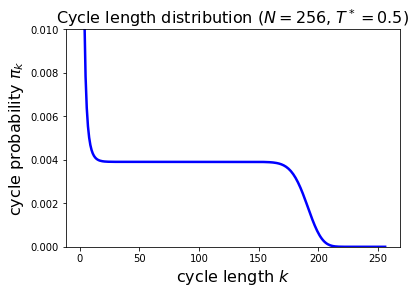

In [36]:
import math, pylab

def z(k, beta):
    return 1.0 / (1.0 - math.exp(- k * beta)) ** 3 #partition function of a single particle in a harmonic trap

def canonic_recursion(N, beta): #Landsberg recursion relations for the partition function of N bosons
    Z = [1.0] #Z_0 = 1
    for M in range(1, N + 1):
        Z.append(sum(Z[k] * z(M - k, beta) \
                     for k in range(M)) / M)
    return Z #list of partition functions for boson numbers up to N

N = 256 #number of bosons
T_star = 0.5 #temperature
beta = 1.0 / N ** (1.0 / 3.0) / T_star
Z = canonic_recursion(N, beta) #partition function
pi_k = [(z(k, beta) * Z[N - k] / Z[-1]) / float(N) for k in range(1, N + 1)] #probability of a cycle of length k
# graphics output
pylab.plot(range(1, N + 1), pi_k, 'b-', lw=2.5)
pylab.ylim(0.0, 0.01)
pylab.xlabel('cycle length $k$', fontsize=16)
pylab.ylabel('cycle probability $\pi_k$', fontsize=16)
pylab.title('Cycle length distribution ($N=%i$, $T^*=%s$)' % (N, T_star), fontsize=16)
pylab.savefig('plot-prob_cycle_length.png')

phase = [pi[k+1] - pi[k] for k in range(1, N+1)]

# graphics output
pylab.plot(range(1, N + 1), pi_k, 'b-', lw=2.5)
pylab.ylim(0.0, 0.01)
pylab.xlabel('cycle length $k$', fontsize=16)
pylab.ylabel('cycle probability $\pi_k$', fontsize=16)
pylab.title('Cycle length distribution ($N=%i$, $T^*=%s$)' % (N, T_star), fontsize=16)
pylab.savefig('plot-prob_cycle_length.png')

Since we have an analytical solution to the problem, we can now implement a rejection-free direct sampling algorithm for the permutations.

In [40]:
import math, random

def z(k, beta): #partition function of a single particle in a harmonic trap
    return (1.0 - math.exp(- k * beta)) ** (-3)

def canonic_recursion(N, beta): #Landsberg recursion relation for the partition function of N bosons in a harmonic trap
    Z = [1.0]
    for M in range(1, N + 1):
        Z.append(sum(Z[k] * z(M - k, beta) for k in range(M)) / M)
    return Z

def make_pi_list(Z, M): #the probability for a boson to be in a permutation length of length up to M?
   pi_list = [0.0] + [z(k, beta) * Z[M - k] / Z[M] / M for k  in range(1, M + 1)]
   pi_cumulative = [0.0]
   for k in range(1, M + 1):
      pi_cumulative.append(pi_cumulative[k - 1] + pi_list[k])
   return pi_cumulative

def naive_tower_sample(pi_cumulative):
    eta = random.uniform(0.0, 1.0)
    for k in range(len(pi_cumulative)):
        if eta < pi_cumulative[k]: break
    return k

def levy_harmonic_path(dtau, N): #path sampling (to sample permutation positions)
   beta = N * dtau
   x_N = random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(beta / 2.0)))
   x = [x_N]
   for k in range(1, N):
      dtau_prime = (N - k) * dtau
      Upsilon_1 = 1.0 / math.tanh(dtau) + 1.0 / math.tanh(dtau_prime)
      Upsilon_2 = x[k - 1] / math.sinh(dtau) +  x_N / math.sinh(dtau_prime)
      x_mean = Upsilon_2 / Upsilon_1
      sigma = 1.0 / math.sqrt(Upsilon_1)
      x.append(random.gauss(x_mean, sigma))
   return x

### main program starts here ###
N = 8 #number of bosons
T_star = 0.1 #temperature
beta = 1.0 / N ** (1.0 / 3.0) / T_star
n_steps = 1000 
Z = canonic_recursion(N, beta) #{N} boson partition function
for step in range(n_steps):
    N_tmp = N #ancillary
    x_config, y_config, z_config = [], [], [] #initialise the configurations in each 3 directions
    while N_tmp > 0: #iterate through all particles
       pi_sum = make_pi_list(Z, N_tmp)
       k = naive_tower_sample(pi_sum)
       x_config += levy_harmonic_path(beta, k)
       y_config += levy_harmonic_path(beta, k)
       z_config += levy_harmonic_path(beta, k)
       N_tmp -= k #reduce the number of particles that are in the permutation cycle of length k

### Physical properties of the 1-dimensional classical and bosonic systems

* Consider 2 non-interacting **distinguishable particles** in a 1-dimensional harmonic trap:

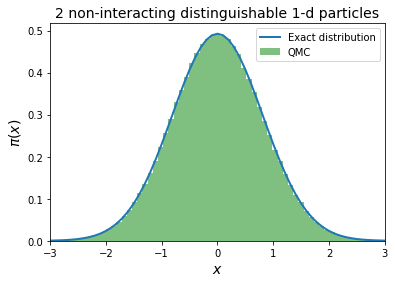

In [5]:
import random, math, pylab

#There are only two possible cases: For k=1, we sample a single position (cycle of length 1), 
#for k=2, we sample two positions (a cycle of length two).
def levy_harmonic_path(k):
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))] #direct-sample the first position
    if k == 2:
        Ups1 = 2.0 / math.tanh(beta)
        Ups2 = 2.0 * x[0] / math.sinh(beta)
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1)))
    return x[:]

def pi_x(x, beta): 
    sigma = 1.0 / math.sqrt(2.0 * math.tanh(beta / 2.0))
    return math.exp(-x ** 2 / (2.0 * sigma ** 2)) / math.sqrt(2.0 * math.pi) / sigma

beta = 2.0
nsteps = 1000000
#initial sample has identity permutation
low = levy_harmonic_path(2) #tau=0
high = low[:] #tau=beta
data = []
for step in xrange(nsteps):
    k = random.choice([0, 1])
    low[k] = levy_harmonic_path(1)[0]
    high[k] = low[k]
    data.append(high[k])
    
list_x = [0.1 * a for a in range (-30, 31)]
y = [pi_x(a, beta) for a in list_x]
pylab.plot(list_x, y, linewidth=2.0, label='Exact distribution')
pylab.hist(data, normed=True, bins=80, label='QMC', alpha=0.5, color='green')
pylab.legend()
pylab.xlabel('$x$',fontsize=14)
pylab.ylabel('$\\pi(x)$',fontsize=14)
pylab.title('2 non-interacting distinguishable 1-d particles',fontsize=14)
pylab.xlim(-3, 3)
pylab.savefig('plot_A1_beta%s.png' % beta)

* Consider two non-interacting **indistinguishable bosonic** quantum particles in a one-dimensional harmonic trap:

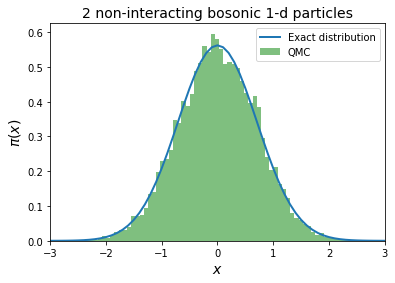

<Figure size 432x288 with 0 Axes>

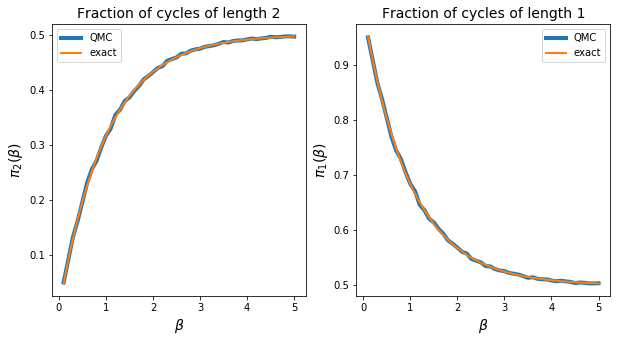

<Figure size 432x288 with 0 Axes>

In [6]:
import math, random, pylab, numpy as np

def z(beta):
    return 1.0 / (1.0 - math.exp(- beta))

def pi_two_bosons(x, beta): #exact two boson position distribution
    pi_x_1 = math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * math.exp(-x ** 2 * math.tanh(beta / 2.0))
    pi_x_2 = math.sqrt(math.tanh(beta)) / math.sqrt(math.pi) * math.exp(-x ** 2 * math.tanh(beta))
    weight_1 = z(beta) ** 2 / (z(beta) ** 2 + z(2.0 * beta))
    weight_2 = z(2.0 * beta) / (z(beta) ** 2 + z(2.0 * beta))
    pi_x = pi_x_1 * weight_1 + pi_x_2 * weight_2
    return pi_x

def levy_harmonic_path(k):
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))]
    if k == 2:
        Ups1 = 2.0 / math.tanh(beta)
        Ups2 = 2.0 * x[0] / math.sinh(beta)
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1)))
    return x[:]

def rho_harm_1d(x, xp, beta):
    Upsilon_1 = (x + xp) ** 2 / 4.0 * math.tanh(beta / 2.0)
    Upsilon_2 = (x - xp) ** 2 / 4.0 / math.tanh(beta / 2.0)
    return math.exp(- Upsilon_1 - Upsilon_2)

beta = 2.0
list_beta = np.linspace(0.1, 5.0)
nsteps = 10000
low = levy_harmonic_path(2)
high = low[:]
fract_one_cycle_dat, fract_two_cycles_dat = [], []

for beta in list_beta:
    one_cycle_dat = 0.0 #initialise the permutation fractions for each temperature
    data = []
    for step in xrange(nsteps):
        # move 1 (direct-sample the positions)
        if low[0] == high[0]: #if the cycle is of length 1
            k = random.choice([0, 1])
            low[k] = levy_harmonic_path(1)[0]
            high[k] = low[k] #assures the cycle
        else: #if the cycle is of length 2s
            low[0], low[1] = levy_harmonic_path(2)
            high[1] = low[0] #assures the cycle
            high[0] = low[1]
            one_cycle_dat += 1.0 / float(nsteps) #calculate the fraction of the single cycle cases
        data += low[:] #save the position histogram data
        # move 2 (Metropolis for sampling the permutations)
        weight_old = (rho_harm_1d(low[0], high[0], beta) * rho_harm_1d(low[1], high[1], beta))
        weight_new = (rho_harm_1d(low[0], high[1], beta) * rho_harm_1d(low[1], high[0], beta))
        if random.uniform(0.0, 1.0) < weight_new / weight_old:
            high[0], high[1] = high[1], high[0]

    fract_one_cycle_dat.append(one_cycle_dat)
    fract_two_cycles_dat.append(1.0 - one_cycle_dat) #save the fraction of the two cycles cases
    
#Exact permutation distributions for all temperatures
fract_two_cycles = [z(beta) ** 2 / (z(beta) ** 2 + z(2.0 * beta)) for beta in list_beta]
fract_one_cycle = [z(2.0 * beta) / (z(beta) ** 2 + z(2.0 * beta)) for beta in list_beta]

#Graphics output:    
list_x = [0.1 * a for a in range (-30, 31)]
y = [pi_two_bosons(a, beta) for a in list_x]
pylab.plot(list_x, y, linewidth=2.0, label='Exact distribution')
pylab.hist(data, normed=True, bins=80, label='QMC', alpha=0.5, color='green')
pylab.legend()
pylab.xlabel('$x$',fontsize=14)
pylab.ylabel('$\\pi(x)$',fontsize=14)
pylab.title('2 non-interacting bosonic 1-d particles',fontsize=14)
pylab.xlim(-3, 3)
pylab.savefig('plot_A2_beta%s.png' % beta)
pylab.show()
pylab.clf()

fig = pylab.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)
ax.plot(list_beta, fract_one_cycle_dat, linewidth=4, label='QMC')
ax.plot(list_beta, fract_one_cycle, linewidth=2, label='exact')
ax.legend()
ax.set_xlabel('$\\beta$',fontsize=14)
ax.set_ylabel('$\\pi_2(\\beta)$',fontsize=14)
ax.set_title('Fraction of cycles of length 2',fontsize=14)

ax = fig.add_subplot(1, 2, 2)
ax.plot(list_beta, fract_two_cycles_dat, linewidth=4, label='QMC')
ax.plot(list_beta, fract_two_cycles, linewidth=2,label='exact')
ax.legend()
ax.set_xlabel('$\\beta$',fontsize=14)
ax.set_ylabel('$\\pi_1(\\beta)$',fontsize=14)
ax.set_title('Fraction of cycles of length 1',fontsize=14)

pylab.savefig('plot_A2.png')
pylab.show()
pylab.clf()

We can use dictionaries instead of lists. The implementation is in the following program. 

Here we also calculate the correlation between the two particles, i.e. sample of the absolute distance $r$ between the two bosons. The comparison between the resulting distribution and the distribution for the distinguishable case corresponds to boson bunching (high weight for small distances between the bosons).

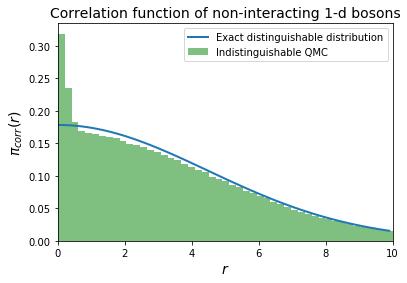

<Figure size 432x288 with 0 Axes>

In [7]:
import math, random, pylab

def prob_r_distinguishable(r, beta): #the exact correlation function for two particles
    sigma = math.sqrt(2.0) / math.sqrt(2.0 * math.tanh(beta / 2.0))
    prob = (math.sqrt(2.0 / math.pi) / sigma) * math.exp(- r ** 2 / 2.0 / sigma ** 2)
    return prob

def levy_harmonic_path(k):
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))]
    if k == 2:
        Ups1 = 2.0 / math.tanh(beta)
        Ups2 = 2.0 * x[0] / math.sinh(beta)
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1)))
    return x[:]

def rho_harm_1d(x, xp, beta):
    Upsilon_1 = (x + xp) ** 2 / 4.0 * math.tanh(beta / 2.0)
    Upsilon_2 = (x - xp) ** 2 / 4.0 / math.tanh(beta / 2.0)
    return math.exp(- Upsilon_1 - Upsilon_2)

beta = 0.1
nsteps = 1000000
low_1, low_2 = levy_harmonic_path(2)
x = {low_1:low_1, low_2:low_2}
data_corr = []
for step in xrange(nsteps):
    # move 1
    a = random.choice(x.keys())
    if a == x[a]:
        dummy = x.pop(a)
        a_new = levy_harmonic_path(1)[0]
        x[a_new] = a_new
    else:
        a_new, b_new = levy_harmonic_path(2)
        x = {a_new:b_new, b_new:a_new}
    r = abs(x.keys()[1] - x.keys()[0])
    data_corr.append(r)
    # move 2
    (low1, high1), (low2, high2) = x.items()
    weight_old = rho_harm_1d(low1, high1, beta) * rho_harm_1d(low2, high2, beta)
    weight_new = rho_harm_1d(low1, high2, beta) * rho_harm_1d(low2, high1, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        x = {low1:high2, low2:high1}
        
#Graphics output:    
list_x = [0.1 * a for a in range (0, 100)]
y = [prob_r_distinguishable(a, beta) for a in list_x]
pylab.plot(list_x, y, linewidth=2.0, label='Exact distinguishable distribution')
pylab.hist(data_corr, normed=True, bins=120, label='Indistinguishable QMC', alpha=0.5, color='green')
pylab.legend()
pylab.xlabel('$r$',fontsize=14)
pylab.ylabel('$\\pi_{corr}(r)$',fontsize=14)
pylab.title('Correlation function of non-interacting 1-d bosons',fontsize=14)
pylab.xlim(0, 10)
pylab.savefig('plot_A3_beta%s.png' % beta)
pylab.show()
pylab.clf()

### 3-dimensional bosons
#### Isotropic trap

starting from file data_boson_configuration_N512_T0.8.txt


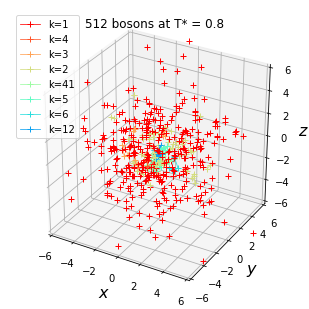

starting from file data_boson_configuration_N512_T0.6.txt


<Figure size 432x288 with 0 Axes>

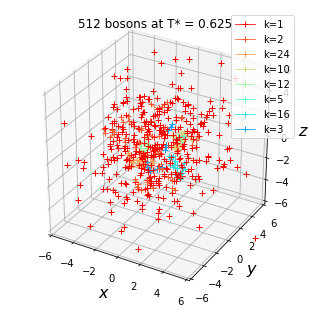

starting from file data_boson_configuration_N512_T0.5.txt


<Figure size 432x288 with 0 Axes>

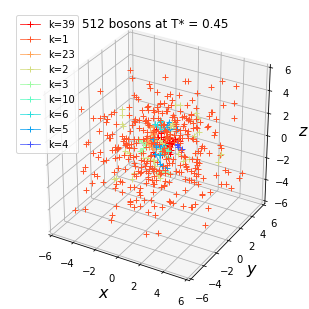

starting from file data_boson_configuration_N512_T0.3.txt


<Figure size 432x288 with 0 Axes>

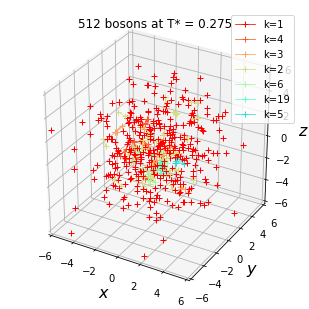

starting from file data_boson_configuration_N512_T0.1.txt


<Figure size 432x288 with 0 Axes>

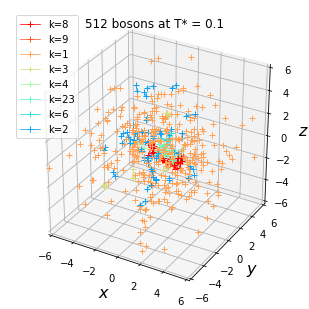

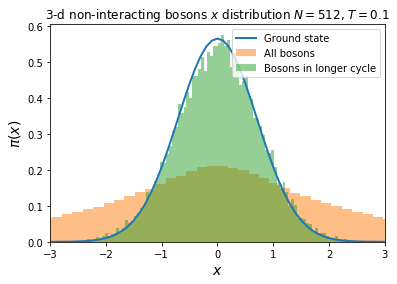

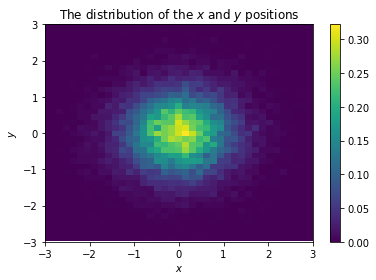

In [264]:
import random, math, numpy, sys, os
import matplotlib.pyplot as plt

def harmonic_ground_state(x):
    return math.exp(-x ** 2)/math.sqrt(math.pi)

def levy_harmonic_path_3d(k):
    x0 = tuple([random.gauss(0.0, 1.0 / math.sqrt(2.0 *
                math.tanh(k * beta / 2.0))) for d in range(3)])
    x = [x0]
    for j in range(1, k):
        Upsilon_1 = 1.0 / math.tanh(beta) + 1.0 / \
                          math.tanh((k - j) * beta)
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta) + x[0][d] /
                     math.sinh((k - j) * beta) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1 for d in range(3)]
        sigma = 1.0 / math.sqrt(Upsilon_1)
        dummy = [random.gauss(x_mean[d], sigma) for d in range(3)]
        x.append(tuple(dummy))
    return x

def rho_harm_3d(x, xp):
    Upsilon_1 = sum((x[d] + xp[d]) ** 2 / 4.0 *
                    math.tanh(beta / 2.0) for d in range(3))
    Upsilon_2 = sum((x[d] - xp[d]) ** 2 / 4.0 /
                    math.tanh(beta / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

N = 512
T_star = 0.8
list_T = numpy.linspace(0.8,0.1,5)
beta = 1.0 / (T_star * N ** (1.0 / 3.0))
cycle_min = 10
nsteps = 50000
data_x, data_y, data_x_l, data_y_l = [], [], [], []

for T_star in list_T:
    # Initial condition
    filename = 'data_boson_configuration_N%i_T%.1f.txt' % (N,T_star)
    positions = {}
    if os.path.isfile(filename):
        f = open(filename, 'r')
        for line in f:
            a = line.split()
            positions[tuple([float(a[0]), float(a[1]), float(a[2])])] = \
                   tuple([float(a[3]), float(a[4]), float(a[5])])
        f.close()
        if len(positions) != N:
            sys.exit('ERROR in the input file.')
        print 'starting from file', filename
    else:
        for k in range(N):
            a = levy_harmonic_path_3d_anisotropic(1)
            positions[a[0]] = a[0]
        print 'Starting from a new configuration'

    # Monte Carlo loop    
    for step in range(nsteps):
        # move 1: resample one permutation cycle
        boson_a = random.choice(positions.keys())
        perm_cycle = []
        while True:
            perm_cycle.append(boson_a)
            boson_b = positions.pop(boson_a)
            if boson_b == perm_cycle[0]:
                break
            else:
               boson_a = boson_b
        k = len(perm_cycle)
        data_x.append(boson_a[0])
        data_y.append(boson_a[1])

        if k > cycle_min:
            data_x_l.append(boson_a[0])
            data_y_l.append(boson_a[1])    
        perm_cycle = levy_harmonic_path_3d(k)
        positions[perm_cycle[-1]] = perm_cycle[0]
        for k in range(len(perm_cycle) - 1):
            positions[perm_cycle[k]] = perm_cycle[k + 1]

        # move 2: exchange
        a_1 = random.choice(positions.keys())
        b_1 = positions.pop(a_1)
        a_2 = random.choice(positions.keys())
        b_2 = positions.pop(a_2)
        weight_new = rho_harm_3d(a_1, b_2) * rho_harm_3d(a_2, b_1)
        weight_old = rho_harm_3d(a_1, b_1) * rho_harm_3d(a_2, b_2)
        if random.uniform(0.0, 1.0) < weight_new / weight_old:
            positions[a_1] = b_2
            positions[a_2] = b_1
        else:
            positions[a_1] = b_1
            positions[a_2] = b_2

    f = open(filename, 'w')
    for a in positions:
       b = positions[a]
       f.write(str(a[0]) + ' ' + str(a[1]) + ' ' + str(a[2]) + ' ' +
               str(b[0]) + ' ' + str(b[1]) + ' ' + str(b[2]) + '\n')
    f.close()

    # Analyze cycles, do 3d plot
    import pylab, mpl_toolkits.mplot3d

    fig = pylab.figure()
    ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)
    ax.set_aspect('equal')
    n_colors = 10
    list_colors = pylab.cm.rainbow(numpy.linspace(0, 1, n_colors))[::-1]
    dict_colors = {}
    i_color = 0
    positions_copy = positions.copy()
    while positions_copy:
        x, y, z = [], [], []
        starting_boson = positions_copy.keys()[0]
        boson_old = starting_boson
        while True:
            x.append(boson_old[0])
            y.append(boson_old[1])
            z.append(boson_old[2])
            boson_new = positions_copy.pop(boson_old)
            if boson_new == starting_boson: break
            else: boson_old = boson_new
        len_cycle = len(x)
        if len_cycle > 2:
            x.append(x[0])
            y.append(y[0])
            z.append(z[0])
        if len_cycle in dict_colors:
            color = dict_colors[len_cycle]
            ax.plot(x, y, z, '+-', c=color, lw=0.75)
        else:
            color = list_colors[i_color]
            i_color = (i_color + 1) % n_colors
            dict_colors[len_cycle] = color
            ax.plot(x, y, z, '+-', c=color, label='k=%i' % len_cycle, lw=0.75)
    pylab.title(str(N) + ' bosons at T* = ' + str(T_star))
    pylab.legend()
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    xmax = 6.0
    ax.set_xlim3d([-xmax, xmax])
    ax.set_ylim3d([-xmax, xmax])
    ax.set_zlim3d([-xmax, xmax])
    pylab.savefig('plot_boson_configuration_N%i_T%.1f.png' %(N,T_star))
    pylab.show()
    pylab.clf()

#Plot the histograms
list_x = [0.1 * a for a in range (-50, 51)]
y = [harmonic_ground_state(a) for a in list_x]
pylab.plot(list_x, y, linewidth=2.0, label='Ground state')
pylab.hist(data_x, normed=True, bins=120, alpha = 0.5, label='All bosons') 
pylab.hist(data_x_l, normed=True, bins=120, alpha = 0.5, label='Bosons in longer cycle') 
pylab.xlim(-3.0, 3.0) 
pylab.xlabel('$x$',fontsize=14)
pylab.ylabel('$\pi(x)$',fontsize=14)
pylab.title('3-d non-interacting bosons $x$ distribution $N= %i$, $T= %.1f$' %(N,T_star))
pylab.legend()
pylab.savefig('position_distribution_N%i_T%.1f.png' %(N,T_star))
pylab.show()
pylab.clf()

plt.hist2d(data_x_l, data_y_l, bins=40, normed=True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('The distribution of the $x$ and $y$ positions')
plt.colorbar()
plt.xlim(-3.0, 3.0) 
plt.ylim(-3.0, 3.0) 
plt.show()

#### Anisotropic trap

We can imitate the experiments that imitate 1-d bosons in *cigar shaped* anisotropic harmonic traps, and 2-d bosons in *pancake shaped* anisotropic harmonic traps.

Populating the interactive namespace from numpy and matplotlib
omega:  [4. 4. 1.]
starting from file data_boson_configuration_anisotropic_N512_T0.5_cigar.txt


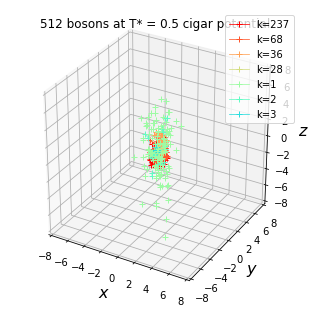

omega:  [1. 5. 1.]
starting from file data_boson_configuration_anisotropic_N512_T0.5_pancake.txt


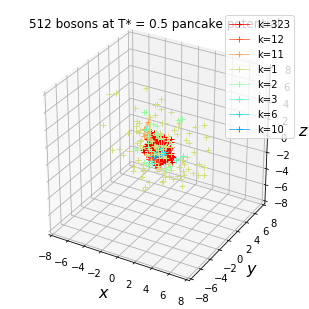

In [8]:
%pylab inline
import random, math, numpy, os, sys

def levy_harmonic_path_3d_anisotropic(k, omega):
    sigma = [1.0 / math.sqrt(2.0 * omega[d] *
             math.tanh(0.5 * k * beta * omega[d])) for d in xrange(3)]
    xk = tuple([random.gauss(0.0, sigma[d]) for d in xrange(3)])
    x = [xk]
    for j in range(1, k):
        Upsilon_1 = [1.0 / math.tanh(beta * omega[d]) +
              1.0 / math.tanh((k - j) * beta * omega[d]) for d in range(3)]
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta * omega[d]) + \
               xk[d] / math.sinh((k - j) * beta * omega[d]) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1[d] for d in range(3)]
        sigma = [1.0 / math.sqrt(Upsilon_1[d] * omega[d]) for d in range(3)]
        dummy = [random.gauss(x_mean[d], sigma[d]) for d in range(3)]
        x.append(tuple(dummy))
    return x

def rho_harm_3d_anisotropic(x, xp, beta, omega):
    Upsilon_1 = sum(omega[d] * (x[d] + xp[d]) ** 2 / 4.0 *
                     math.tanh(beta * omega[d] / 2.0) for d in range(3))
    Upsilon_2 = sum(omega[d] * (x[d] - xp[d]) ** 2 / 4.0 /
                     math.tanh(beta * omega[d] / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

omegas = numpy.array([[4.0, 4.0, 1.0], [1.0, 5.0, 1.0]])

for i in range(len(omegas[:,1])):
    N = 512
    nsteps = 100000
    omega_harm = 1.0
    omega = omegas[i,:]
    for d in range(3):
        omega_harm *= omega[d] ** (1.0 / 3.0)
    T_star = 0.5
    T = T_star * omega_harm * N ** (1.0 / 3.0)
    beta = 1.0 / T
    print 'omega: ', omega
    # Initial condition
    if i == 0:
        filename = 'data_boson_configuration_anisotropic_N%i_T%.1f_cigar.txt' % (N,T_star)
    elif i == 1:
        filename = 'data_boson_configuration_anisotropic_N%i_T%.1f_pancake.txt' % (N,T_star)
    positions = {}
    if os.path.isfile(filename):
        f = open(filename, 'r')
        for line in f:
            a = line.split()
            positions[tuple([float(a[0]), float(a[1]), float(a[2])])] = \
                   tuple([float(a[3]), float(a[4]), float(a[5])])
        f.close()
        if len(positions) != N:
            sys.exit('ERROR in the input file.')
        print 'starting from file', filename
    else:
        for k in range(N):
            a = levy_harmonic_path_3d_anisotropic(1,omega)
            positions[a[0]] = a[0]
        print 'Starting from a new configuration'
    for step in range(nsteps):
        boson_a = random.choice(positions.keys())
        perm_cycle = []
        while True:
            perm_cycle.append(boson_a)
            boson_b = positions.pop(boson_a)
            if boson_b == perm_cycle[0]: break
            else: boson_a = boson_b
        k = len(perm_cycle)
        perm_cycle = levy_harmonic_path_3d_anisotropic(k,omega)
        positions[perm_cycle[-1]] = perm_cycle[0]
        for j in range(len(perm_cycle) - 1):
            positions[perm_cycle[j]] = perm_cycle[j + 1]
        a_1 = random.choice(positions.keys())
        b_1 = positions.pop(a_1)
        a_2 = random.choice(positions.keys())
        b_2 = positions.pop(a_2)
        weight_new = (rho_harm_3d_anisotropic(a_1, b_2, beta, omega) *
                      rho_harm_3d_anisotropic(a_2, b_1, beta, omega))
        weight_old = (rho_harm_3d_anisotropic(a_1, b_1, beta, omega) *
                      rho_harm_3d_anisotropic(a_2, b_2, beta, omega))
        if random.uniform(0.0, 1.0) < weight_new / weight_old:
            positions[a_1], positions[a_2] = b_2, b_1
        else:
            positions[a_1], positions[a_2] = b_1, b_2

    f = open(filename, 'w')
    for a in positions:
       b = positions[a]
       f.write(str(a[0]) + ' ' + str(a[1]) + ' ' + str(a[2]) + ' ' +
               str(b[0]) + ' ' + str(b[1]) + ' ' + str(b[2]) + '\n')
    f.close()

    import pylab, mpl_toolkits.mplot3d
    fig = pylab.figure()
    ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)
    ax.set_aspect('equal')
    n_colors = 10
    list_colors = pylab.cm.rainbow(numpy.linspace(0, 1, n_colors))[::-1]
    dict_colors = {}
    i_color = 0
    positions_copy = positions.copy()
    while positions_copy:
        x, y, z = [], [], []
        starting_boson = positions_copy.keys()[0]
        boson_old = starting_boson
        while True:
            x.append(boson_old[0])
            y.append(boson_old[1])
            z.append(boson_old[2])
            boson_new = positions_copy.pop(boson_old)
            if boson_new == starting_boson: break
            else: boson_old = boson_new
        len_cycle = len(x)
        if len_cycle > 2:
            x.append(x[0])
            y.append(y[0])
            z.append(z[0])
        if len_cycle in dict_colors:
            color = dict_colors[len_cycle]
            ax.plot(x, y, z, '+-', c=color, lw=0.75)
        else:
            color = list_colors[i_color]
            i_color = (i_color + 1) % n_colors
            dict_colors[len_cycle] = color
            ax.plot(x, y, z, '+-', c=color, label='k=%i' % len_cycle, lw=0.75)
    pylab.legend()
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    xmax = 8.0
    ax.set_xlim3d([-xmax, xmax])
    ax.set_ylim3d([-xmax, xmax])
    ax.set_zlim3d([-xmax, xmax])
    if i == 0:
        pylab.title(str(N) + ' bosons at T* = ' + str(T_star) + ' cigar potential')
        pylab.savefig('position_distribution_N%i_T%.1f_cigar.png' %(N,T_star))
    elif i == 1:
        pylab.title(str(N) + ' bosons at T* = ' + str(T_star) + ' pancake potential')
        pylab.savefig('position_distribution_N%i_T%.1f_pancake.png' %(N,T_star))
    pylab.show()    

There it is found that the critical temperature for Bose-Einstein condensation is around $T^*\sim 0.9$.

## To do:

* Calculate the pair correlation function